Phase 3



SQL Operations



Note: Create a separate table for each file and give a meaningful name.



When you are inserting make sure you are NOT inserting the column name in the table, else you don’t get a result.



3.1	Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table



3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year



3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year



3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table



3.5	Write SQL query to find the highest number of dacoity/robbery in which district.



3.6	Write SQL query to find in which districts(All) the lowest number of murders happened



3.7	Write SQL query to find the number of murders in ascending order in district and yearwise.



3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table



3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.



3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.



3.8.4	Use appropriate graphs to show your data (the result of 3.8.3)



# 3.1 Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [1]:
import csv
import sqlite3

# Connect to SQLite database
db = sqlite3.connect('crime_in_india_database.db')
cursor = db.cursor()

# Drop table if already exist
db.execute("drop table if exists STATE_District_wise_crimes_against_women_FROM_2001_TO_2012")

# Creating table 
db.execute ("create table STATE_District_wise_crimes_against_women_FROM_2001_TO_2012(STATEUT,DISTRICT,Year,rape,kidnapping,Dowry_Deaths,Assault_on_women_modesty,Insult_modesty_Women,Cruelty_Husband_Relatives,Importation_Girls)")
# Path to your CSV file
csv_file_path = '42_District_wise_crimes_committed_against_women_2001_2012.csv'

# Open the CSV file and read data into the database
with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)  # Skip the header row if it exists

    for row in csv_reader:
        # Assuming your table has three columns named column1, column2, column3
        cursor.execute('''
            INSERT INTO STATE_District_wise_crimes_against_women_FROM_2001_TO_2012(STATEUT,DISTRICT,Year,rape,kidnapping,Dowry_Deaths,Assault_on_women_modesty,Insult_modesty_Women,Cruelty_Husband_Relatives,Importation_Girls)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        ''', row)



In [2]:
results = db.execute("select * from STATE_District_wise_crimes_against_women_FROM_2001_TO_2012 order by DISTRICT")
for row in results:
    print(row)
print("-" * 9017)

('WEST BENGAL', '24 PARGANAS NORTH', '2001', '53', '63', '23', '63', '0', '447', '0')
('WEST BENGAL', '24 PARGANAS NORTH', '2002', '88', '63', '29', '84', '1', '630', '0')
('WEST BENGAL', '24 PARGANAS NORTH', '2003', '92', '103', '24', '105', '3', '672', '0')
('WEST BENGAL', '24 PARGANAS NORTH', '2004', '176', '124', '55', '154', '4', '810', '0')
('WEST BENGAL', '24 PARGANAS NORTH', '2005', '217', '153', '71', '151', '5', '886', '0')
('WEST BENGAL', '24 PARGANAS NORTH', '2006', '174', '140', '74', '175', '5', '1049', '0')
('WEST BENGAL', '24 PARGANAS NORTH', '2007', '231', '236', '53', '187', '2', '1696', '0')
('WEST BENGAL', '24 PARGANAS NORTH', '2008', '192', '215', '67', '209', '5', '1946', '0')
('WEST BENGAL', '24 PARGANAS NORTH', '2009', '166', '249', '54', '203', '3', '2225', '0')
('WEST BENGAL', '24 PARGANAS NORTH', '2010', '173', '292', '71', '174', '8', '2378', '5')
('WEST BENGAL', '24 PARGANAS NORTH', '2011', '203', '414', '88', '218', '10', '2847', '0')
('WEST BENGAL', '24 P

# 3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

In [3]:
# Find the maximum rape count
max_rape_query = "SELECT * FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012 ORDER BY rape DESC LIMIT 1"
result_max_rape = db.execute(max_rape_query).fetchone()

# Find the maximum kidnapping count
max_kidnapping_query = "SELECT * FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012 ORDER BY kidnapping DESC LIMIT 1"
result_max_kidnapping = db.execute(max_kidnapping_query).fetchone()

# Print the results
print("Maximum Rape:")
print(result_max_rape)

print("\nMaximum Kidnapping:")
print(result_max_kidnapping)

Maximum Rape:
('CHHATTISGARH', 'TOTAL', '2006', '995', '178', '103', '1598', '143', '717', '1')

Maximum Kidnapping:
('MAHARASHTRA', 'TOTAL', '2008', '1558', '998', '390', '3619', '1091', '7829', '0')


In [4]:

# Find the maximum rape count state-wise
max_rape_query_state = """
    SELECT STATEUT, MAX(rape) AS max_rape
    FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012
    GROUP BY STATEUT
"""
result_max_rape_state = db.execute(max_rape_query_state).fetchall()

# Find the maximum kidnapping count state-wise
max_kidnapping_query_state = """
    SELECT STATEUT, MAX(kidnapping) AS max_kidnapping
    FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012
    GROUP BY STATEUT
"""
result_max_kidnapping_state = db.execute(max_kidnapping_query_state).fetchall()

# Find the maximum rape count district-wise
max_rape_query_district = """
    SELECT STATEUT, DISTRICT, MAX(rape) AS max_rape
    FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012
    GROUP BY STATEUT, DISTRICT
"""
result_max_rape_district = db.execute(max_rape_query_district).fetchall()

# Find the maximum kidnapping count district-wise
max_kidnapping_query_district = """
    SELECT STATEUT, DISTRICT, MAX(kidnapping) AS max_kidnapping
    FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012
    GROUP BY STATEUT, DISTRICT
"""
result_max_kidnapping_district = db.execute(max_kidnapping_query_district).fetchall()

# Print the results
print("Maximum Rape State-wise:")
print(result_max_rape_state)

print("\nMaximum Kidnapping State-wise:")
print(result_max_kidnapping_state)

print("\nMaximum Rape District-wise:")
print(result_max_rape_district)

print("\nMaximum Kidnapping District-wise:")
print(result_max_kidnapping_district)

Maximum Rape State-wise:
[('A & N ISLANDS', '8'), ('ANDHRA PRADESH', '99'), ('ARUNACHAL PRADESH', '9'), ('ASSAM', '99'), ('BIHAR', '985'), ('CHANDIGARH', '33'), ('CHHATTISGARH', '995'), ('D & N HAVELI', '7'), ('DAMAN & DIU', '5'), ('DELHI', '96'), ('GOA', '9'), ('GUJARAT', '9'), ('HARYANA', '9'), ('HIMACHAL PRADESH', '9'), ('JAMMU & KASHMIR', '9'), ('JHARKHAND', '92'), ('KARNATAKA', '97'), ('KERALA', '97'), ('LAKSHADWEEP', '2'), ('MADHYA PRADESH', '99'), ('MAHARASHTRA', '93'), ('MANIPUR', '9'), ('MEGHALAYA', '9'), ('MIZORAM', '92'), ('NAGALAND', '9'), ('ODISHA', '985'), ('PUDUCHERRY', '9'), ('PUNJAB', '9'), ('RAJASTHAN', '993'), ('SIKKIM', '9'), ('TAMIL NADU', '94'), ('TRIPURA', '86'), ('UTTAR PRADESH', '93'), ('UTTARAKHAND', '9'), ('WEST BENGAL', '97')]

Maximum Kidnapping State-wise:
[('A & N ISLANDS', '9'), ('ANDHRA PRADESH', '995'), ('ARUNACHAL PRADESH', '9'), ('ASSAM', '99'), ('BIHAR', '997'), ('CHANDIGARH', '66'), ('CHHATTISGARH', '9'), ('D & N HAVELI', '9'), ('DAMAN & DIU', '3')

In [5]:
# Find the maximum rape count state-wise
max_rape_query_state = """
    SELECT *
    FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012
    WHERE rape = (SELECT MAX(rape) FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012)
    ORDER BY STATEUT
"""
result_max_rape_state = db.execute(max_rape_query_state).fetchall()

# Find the maximum kidnapping count state-wise
max_kidnapping_query_state = """
    SELECT *
    FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012
    WHERE kidnapping = (SELECT MAX(kidnapping) FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012)
    ORDER BY STATEUT
"""
result_max_kidnapping_state = db.execute(max_kidnapping_query_state).fetchall()

# Find the maximum rape count district-wise
max_rape_query_district = """
    SELECT *
    FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012
    WHERE rape = (SELECT MAX(rape) FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012)
    ORDER BY STATEUT, DISTRICT
"""
result_max_rape_district = db.execute(max_rape_query_district).fetchall()

# Find the maximum kidnapping count district-wise
max_kidnapping_query_district = """
    SELECT *
    FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012
    WHERE kidnapping = (SELECT MAX(kidnapping) FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012)
    ORDER BY STATEUT, DISTRICT
"""
result_max_kidnapping_district = db.execute(max_kidnapping_query_district).fetchall()

# Print the results
print("Maximum Rape State-wise:")
print(result_max_rape_state)

print("\nMaximum Kidnapping State-wise:")
print(result_max_kidnapping_state)

print("\nMaximum Rape District-wise:")
print(result_max_rape_district)

print("\nMaximum Kidnapping District-wise:")
print(result_max_kidnapping_district)

Maximum Rape State-wise:
[('CHHATTISGARH', 'TOTAL', '2006', '995', '178', '103', '1598', '143', '717', '1')]

Maximum Kidnapping State-wise:
[('MAHARASHTRA', 'TOTAL', '2008', '1558', '998', '390', '3619', '1091', '7829', '0')]

Maximum Rape District-wise:
[('CHHATTISGARH', 'TOTAL', '2006', '995', '178', '103', '1598', '143', '717', '1')]

Maximum Kidnapping District-wise:
[('MAHARASHTRA', 'TOTAL', '2008', '1558', '998', '390', '3619', '1091', '7829', '0')]


# final output of 3.2

We observe that 
Maximum Rape State-wise:
[('CHHATTISGARH', 'TOTAL', '2006', '995', '178', '103', '1598', '143', '717', '1')]

Maximum Kidnapping State-wise:
[('MAHARASHTRA', 'TOTAL', '2008', '1558', '998', '390', '3619', '1091', '7829', '0')]

Maximum Rape District-wise:
[('CHHATTISGARH', 'TOTAL', '2006', '995', '178', '103', '1598', '143', '717', '1')]

Maximum Kidnapping District-wise:
[('MAHARASHTRA', 'TOTAL', '2008', '1558', '998', '390', '3619', '1091', '7829', '0')]   is my final result

# 3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

In [6]:
# Find the minimum rape count state-wise
min_rape_query_state = """
    SELECT *
    FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012
    WHERE rape = (SELECT MIN(rape) FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012)
    ORDER BY STATEUT
"""
result_min_rape_state = db.execute(min_rape_query_state).fetchall()

# Find the minimum kidnapping count state-wise
min_kidnapping_query_state = """
    SELECT *
    FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012
    WHERE kidnapping = (SELECT MIN(kidnapping) FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012)
    ORDER BY STATEUT
"""
result_min_kidnapping_state = db.execute(min_kidnapping_query_state).fetchall()

# Find the minimum rape count district-wise
min_rape_query_district = """
    SELECT *
    FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012
    WHERE rape = (SELECT MIN(rape) FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012)
    ORDER BY STATEUT, DISTRICT
"""
result_min_rape_district = db.execute(min_rape_query_district).fetchall()

# Find the minimum kidnapping count district-wise
min_kidnapping_query_district = """
    SELECT *
    FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012
    WHERE kidnapping = (SELECT MIN(kidnapping) FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012)
    ORDER BY STATEUT, DISTRICT
"""
result_min_kidnapping_district = db.execute(min_kidnapping_query_district).fetchall()

# Print the results
print("Minimum Rape State-wise:")
print(result_min_rape_state)

print("\nMinimum Kidnapping State-wise:")
print(result_min_kidnapping_state)

print("\nMinimum Rape District-wise:")
print(result_min_rape_district)

print("\nMinimum Kidnapping District-wise:")
print(result_min_kidnapping_district)

Minimum Rape State-wise:
[('A & N ISLANDS', 'NICOBAR', '2001', '0', '0', '0', '1', '0', '0', '0'), ('A & N ISLANDS', 'NICOBAR', '2003', '0', '0', '0', '0', '0', '0', '0'), ('A & N ISLANDS', 'NICOBAR', '2004', '0', '0', '0', '1', '0', '0', '0'), ('A & N ISLANDS', 'NICOBAR', '2005', '0', '0', '0', '1', '0', '0', '0'), ('A & N ISLANDS', 'NICOBAR', '2006', '0', '0', '0', '2', '0', '0', '0'), ('A & N ISLANDS', 'NICOBAR', '2008', '0', '0', '0', '0', '0', '1', '0'), ('A & N ISLANDS', 'NICOBAR', '2009', '0', '0', '0', '1', '0', '0', '0'), ('A & N ISLANDS', 'NICOBAR', '2011', '0', '0', '0', '1', '0', '0', '0'), ('A & N ISLANDS', 'CAR', '2012', '0', '1', '0', '1', '0', '0', '0'), ('ANDHRA PRADESH', 'GUNTAKAL RLY.', '2001', '0', '0', '0', '1', '0', '0', '0'), ('ANDHRA PRADESH', 'SECUNDERABAD RLY.', '2001', '0', '0', '1', '0', '1', '0', '0'), ('ANDHRA PRADESH', 'SECUNDERABAD RLY.', '2002', '0', '0', '0', '0', '0', '0', '0'), ('ANDHRA PRADESH', 'SECUNDERABAD RLY.', '2003', '0', '0', '0', '0', '0', 

we observe that
Minimum Rape State-wise:
[('A & N ISLANDS', 'NICOBAR', '2001', '0', '0', '0', '1', '0', '0', '0')
  
Minimum Kidnapping State-wise:
[('A & N ISLANDS', 'NICOBAR', '2001', '0', '0', '0', '1', '0', '0', '0')
 
Minimum Rape District-wise:
[('A & N ISLANDS', 'CAR', '2012', '0', '1', '0', '1', '0', '0', '0')
 
Minimum Kidnapping District-wise:
[('A & N ISLANDS', 'NICOBAR', '2001', '0', '0', '0', '1', '0', '0', '0')
 


# 3.4 Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

3.5 Write SQL query to find the highest number of dacoity/robbery in which district.

3.6 Write SQL query to find in which districts(All) the lowest number of murders happened

3.7 Write SQL query to find the number of murders in ascending order in district and yearwise.

3.4 Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [7]:
# Connect to SQLite database
db1 = sqlite3.connect('1crime_in_india_database.db')
cursor = db1.cursor()

# Drop table if already exist
db1.execute("drop table if exists District_wise_crimes_committed_against_SC_2001_2012")

# Creating table 
db1.execute ("create table District_wise_crimes_committed_against_SC_2001_2012(STATE_UT,DISTRICT,Year,Murder,Rape,Kidnapping,Dacoity,Robbery,Arson,Hurt,POA,PCR,Other_Crimes_Against_SCs)")
# Path to your CSV file
csv_file_path = '02_01_District_wise_crimes_committed_against_SC_2001_2012.csv'

# Open the CSV file and read data into the database
with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)  # Skip the header row if it exists

    for row in csv_reader:
        # Assuming your table has three columns named column1, column2, column3
        cursor.execute('''
            INSERT INTO District_wise_crimes_committed_against_SC_2001_2012(STATE_UT,DISTRICT,Year,Murder,Rape,Kidnapping,Dacoity,Robbery,Arson,Hurt,POA,PCR,Other_Crimes_Against_SCs)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        ''', row)


In [8]:
results = db1.execute("select * from District_wise_crimes_committed_against_SC_2001_2012")
for row in results:
    print(row)
print("-" * 9018)

('ANDHRA PRADESH', 'ADILABAD', '2001', '0', '1', '4', '0', '0', '0', '3', '0', '15', '32')
('ANDHRA PRADESH', 'ANANTAPUR', '2001', '0', '4', '0', '0', '0', '0', '49', '21', '0', '53')
('ANDHRA PRADESH', 'CHITTOOR', '2001', '3', '3', '0', '0', '0', '0', '38', '36', '0', '34')
('ANDHRA PRADESH', 'CUDDAPAH', '2001', '0', '3', '0', '0', '0', '0', '20', '52', '0', '25')
('ANDHRA PRADESH', 'EAST GODAVARI', '2001', '1', '3', '0', '0', '0', '0', '3', '12', '63', '7')
('ANDHRA PRADESH', 'GUNTAKAL RLY.', '2001', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0')
('ANDHRA PRADESH', 'GUNTUR', '2001', '4', '5', '1', '0', '0', '3', '53', '16', '6', '53')
('ANDHRA PRADESH', 'HYDERABAD CITY', '2001', '0', '2', '1', '0', '0', '0', '0', '40', '1', '35')
('ANDHRA PRADESH', 'KARIMNAGAR', '2001', '8', '1', '3', '3', '1', '0', '52', '72', '6', '10')
('ANDHRA PRADESH', 'KHAMMAM', '2001', '2', '6', '0', '0', '0', '0', '12', '51', '0', '90')
('ANDHRA PRADESH', 'KRISHNA', '2001', '1', '2', '4', '0', '0', '0', '1

3.5 Write SQL query to find the highest number of dacoity/robbery in which district.

In [9]:
# Find the district with the highest number of Dacoity
max_dacoity_query = """
    SELECT *
    FROM District_wise_crimes_committed_against_SC_2001_2012
    ORDER BY Dacoity DESC
    LIMIT 1
"""
result_max_dacoity = db1.execute(max_dacoity_query).fetchone()

# Find the district with the highest number of Robbery
max_robbery_query = """
    SELECT *
    FROM District_wise_crimes_committed_against_SC_2001_2012
    ORDER BY Robbery DESC
    LIMIT 1
"""
result_max_robbery = db1.execute(max_robbery_query).fetchone()

# Print the results
print("District with the Highest Dacoity:")
print(result_max_dacoity)

print("\nDistrict with the Highest Robbery:")
print(result_max_robbery)

District with the Highest Dacoity:
('GUJARAT', 'DAHOD', '2002', '0', '0', '0', '9', '12', '0', '3', '1', '0', '12')

District with the Highest Robbery:
('MADHYA PRADESH', 'TOTAL', '2001', '72', '305', '31', '1', '9', '50', '663', '435', '1', '2645')


3.6 Write SQL query to find in which districts(All) the lowest number of murders happened

In [10]:
# Find the district with the lowest number of murders
min_murder_query = """
    SELECT *
    FROM District_wise_crimes_committed_against_SC_2001_2012
    ORDER BY Murder ASC
    LIMIT 1
"""
result_min_murder = db1.execute(min_murder_query).fetchone()

# Print the result
print("District with the Lowest Murders:")
print(result_min_murder)

District with the Lowest Murders:
('ANDHRA PRADESH', 'ADILABAD', '2001', '0', '1', '4', '0', '0', '0', '3', '0', '15', '32')


3.7 Write SQL query to find the number of murders in ascending order in district and yearwise.

In [12]:
# Retrieve the number of murders in ascending order, district-wise and year-wise
murder_query = """
    SELECT *
    FROM District_wise_crimes_committed_against_SC_2001_2012
    ORDER BY DISTRICT ASC, Year ASC
"""
result_murder = db1.execute(murder_query).fetchall()

# Print the results
for row in result_murder:
    print(row)

('WEST BENGAL', '24 PARGANAS NORTH', '2001', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0')
('WEST BENGAL', '24 PARGANAS NORTH', '2002', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0')
('WEST BENGAL', '24 PARGANAS NORTH', '2003', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0')
('WEST BENGAL', '24 PARGANAS NORTH', '2004', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0')
('WEST BENGAL', '24 PARGANAS NORTH', '2005', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1')
('WEST BENGAL', '24 PARGANAS NORTH', '2006', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1')
('WEST BENGAL', '24 PARGANAS NORTH', '2007', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0')
('WEST BENGAL', '24 PARGANAS NORTH', '2008', '0', '0', '0', '0', '0', '0', '1', '2', '0', '1')
('WEST BENGAL', '24 PARGANAS NORTH', '2009', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0')
('WEST BENGAL', '24 PARGANAS NORTH', '2010', '0', '0', '0', '0', '0', '0', '0', '5', '0', '5')
('WEST BENGAL', '24 PARGANAS NORTH', '2011', '0', 

In [13]:
# Commit the changes and close the connection
db1.commit()
db1.close()

# 3.8.1 Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 
01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

3.8.2 Write SQL query to find which District in each state/ut has the highest number of murders yearwise. 
Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

3.8.3 Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more
than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

3.8.4 Use appropriate graphs to show your data (the result of 3.8.3)

3.8.1 Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 
01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [14]:
# Connect to SQLite database
db3 = sqlite3.connect('2crime_in_india_database.db')
cursor = db3.cursor()

# Drop table if already exist
db3.execute("drop table if exists District_wise_crimes_committed_IPC_2001_2012")

# Creating table 
db3.execute ("create table District_wise_crimes_committed_IPC_2001_2012(STATE_UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,RAPE)")
# Path to your CSV file
csv_file_path = '01_District_wise_crimes_committed_IPC_2001_2012.csv'

# Open the CSV file and read data into the database
with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)  # Skip the header row if it exists

    for row in csv_reader:
        # Assuming your table has three columns named column1, column2, column3
        cursor.execute('''
            INSERT INTO District_wise_crimes_committed_IPC_2001_2012(STATE_UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,RAPE)
            VALUES (?, ?, ?, ?, ?, ?)
        ''', row)


In [15]:
results = db3.execute("select * from District_wise_crimes_committed_IPC_2001_2012 order by DISTRICT")
for row in results:
    print(row)
print("-" * 9017)

('WEST BENGAL', '24 PARGANAS NORTH', '2001', '202', '23', '53')
('WEST BENGAL', '24 PARGANAS NORTH', '2002', '204', '55', '88')
('WEST BENGAL', '24 PARGANAS NORTH', '2003', '193', '30', '92')
('WEST BENGAL', '24 PARGANAS NORTH', '2004', '177', '43', '176')
('WEST BENGAL', '24 PARGANAS NORTH', '2005', '168', '70', '217')
('WEST BENGAL', '24 PARGANAS NORTH', '2006', '154', '82', '174')
('WEST BENGAL', '24 PARGANAS NORTH', '2007', '194', '6', '231')
('WEST BENGAL', '24 PARGANAS NORTH', '2008', '192', '168', '192')
('WEST BENGAL', '24 PARGANAS NORTH', '2009', '229', '238', '166')
('WEST BENGAL', '24 PARGANAS NORTH', '2010', '244', '224', '173')
('WEST BENGAL', '24 PARGANAS NORTH', '2011', '232', '215', '203')
('WEST BENGAL', '24 PARGANAS NORTH', '2012', '140', '108', '118')
('WEST BENGAL', '24 PARGANAS SOUTH', '2001', '107', '5', '47')
('WEST BENGAL', '24 PARGANAS SOUTH', '2002', '140', '2', '68')
('WEST BENGAL', '24 PARGANAS SOUTH', '2003', '125', '5', '89')
('WEST BENGAL', '24 PARGANAS S

3.8.2 Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output
should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [16]:
# Find the highest number of murders year-wise
max_murders_query = """
    SELECT STATE_UT, YEAR, DISTRICT, MAX(MURDER) AS MAX_MURDER
    FROM District_wise_crimes_committed_IPC_2001_2012
    GROUP BY STATE_UT, YEAR, DISTRICT
    ORDER BY YEAR DESC, MAX_MURDER DESC
"""
result_max_murders = db3.execute(max_murders_query).fetchall()

# Print the results
for row in result_max_murders:
    print(row)

('CHHATTISGARH', '2012', 'TOTAL', '998')
('HARYANA', '2012', 'TOTAL', '991')
('BIHAR', '2012', 'BHAGALPUR', '99')
('BIHAR', '2012', 'SAMASTIPUR', '99')
('GUJARAT', '2012', 'SURAT COMMR.', '98')
('MADHYA PRADESH', '2012', 'JABALPUR', '98')
('UTTAR PRADESH', '2012', 'GORAKHPUR', '98')
('BIHAR', '2012', 'PURNEA', '97')
('BIHAR', '2012', 'SITAMARHI', '97')
('ODISHA', '2012', 'KEONJHAR', '97')
('ANDHRA PRADESH', '2012', 'GUNTUR', '96')
('DELHI UT', '2012', 'OUTER', '96')
('MADHYA PRADESH', '2012', 'GWALIOR', '96')
('UTTAR PRADESH', '2012', 'SITAPUR', '96')
('ANDHRA PRADESH', '2012', 'NELLORE', '94')
('KARNATAKA', '2012', 'BANGALORE RURAL', '93')
('MAHARASHTRA', '2012', 'SOLAPUR RURAL', '92')
('ANDHRA PRADESH', '2012', 'CHITTOOR', '91')
('ANDHRA PRADESH', '2012', 'WEST GODAVARI', '91')
('ASSAM', '2012', 'SONITPUR', '91')
('BIHAR', '2012', 'KATIHAR', '91')
('KARNATAKA', '2012', 'TUMKUR', '91')
('RAJASTHAN', '2012', 'BHARATPUR', '91')
('WEST BENGAL', '2012', 'BURDWAN', '91')
('GUJARAT', '2012'

In [17]:
# Commit the changes and close the connection
db3.commit()
db3.close()

3.8.3 Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years 
and print the corresponding state/ut, district, murders, and year in descending order.

In [20]:
import pandas as pd

# Assuming you have a database connection object named 'db'

# Find the maximum rape count
max_rape_query = "SELECT * FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012 ORDER BY rape DESC LIMIT 1"
result_max_rape = db.execute(max_rape_query).fetchone()

# Find the maximum kidnapping count
max_kidnapping_query = "SELECT * FROM STATE_District_wise_crimes_against_women_FROM_2001_TO_2012 ORDER BY kidnapping DESC LIMIT 1"
result_max_kidnapping = db.execute(max_kidnapping_query).fetchone()

# Get column names from the description
columns_rape = [desc[0] for desc in db.execute(max_rape_query).description]
columns_kidnapping = [desc[0] for desc in db.execute(max_kidnapping_query).description]

# Create Pandas DataFrames
if result_max_rape:
    df_max_rape = pd.DataFrame([result_max_rape], columns=columns_rape)
else:
    df_max_rape = pd.DataFrame()

if result_max_kidnapping:
    df_max_kidnapping = pd.DataFrame([result_max_kidnapping], columns=columns_kidnapping)
else:
    df_max_kidnapping = pd.DataFrame()

# Print the DataFrames
print("DataFrame for Maximum Rape:")
print(df_max_rape)

print("\nDataFrame for Maximum Kidnapping:")
print(df_max_kidnapping)

# Save the DataFrames to CSV files
df_max_rape.to_csv("max_rape_result.csv", index=False)
df_max_kidnapping.to_csv("max_kidnapping_result.csv", index=False)

DataFrame for Maximum Rape:
        STATEUT DISTRICT  Year rape kidnapping Dowry_Deaths  \
0  CHHATTISGARH    TOTAL  2006  995        178          103   

  Assault_on_women_modesty Insult_modesty_Women Cruelty_Husband_Relatives  \
0                     1598                  143                       717   

  Importation_Girls  
0                 1  

DataFrame for Maximum Kidnapping:
       STATEUT DISTRICT  Year  rape kidnapping Dowry_Deaths  \
0  MAHARASHTRA    TOTAL  2008  1558        998          390   

  Assault_on_women_modesty Insult_modesty_Women Cruelty_Husband_Relatives  \
0                     3619                 1091                      7829   

  Importation_Girls  
0                 0  


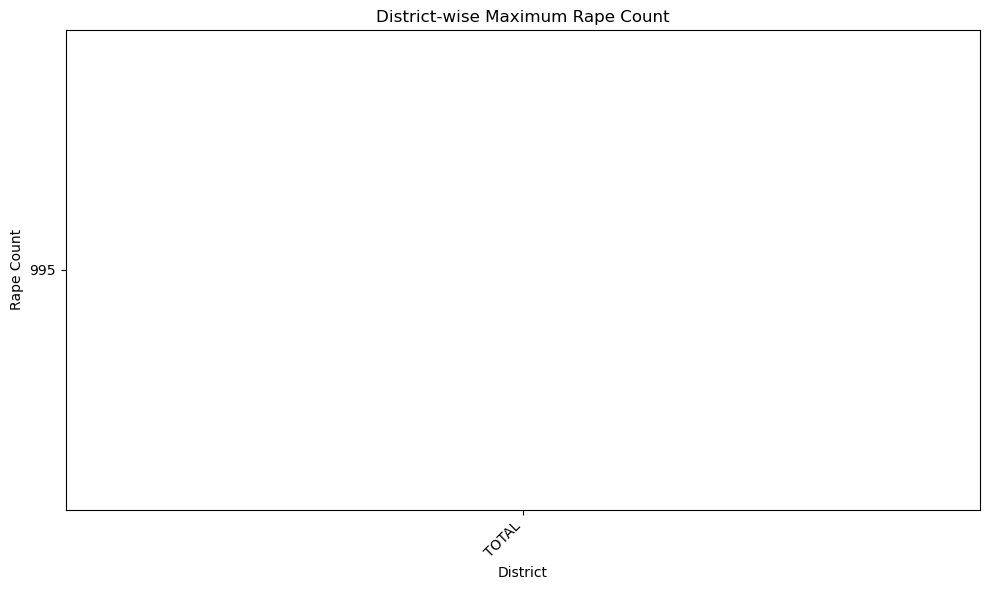

In [23]:
import matplotlib.pyplot as plt

# i have Pandas DataFrames df_max_rape and df_max_kidnapping

# Plot bar chart for maximum rape
plt.figure(figsize=(10, 6))
plt.bar(df_max_rape['DISTRICT'], df_max_rape['rape'], color='blue')
plt.xlabel('District')
plt.ylabel('Rape Count')
plt.title('District-wise Maximum Rape Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



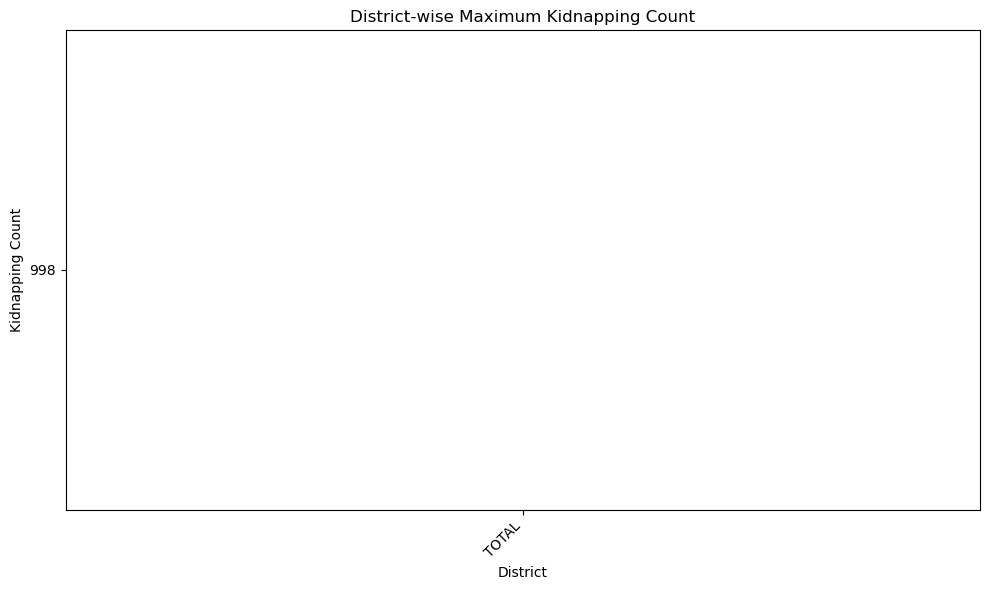

In [24]:
# Plot bar chart for maximum kidnapping
plt.figure(figsize=(10, 6))
plt.bar(df_max_kidnapping['DISTRICT'], df_max_kidnapping['kidnapping'], color='orange')
plt.xlabel('District')
plt.ylabel('Kidnapping Count')
plt.title('District-wise Maximum Kidnapping Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

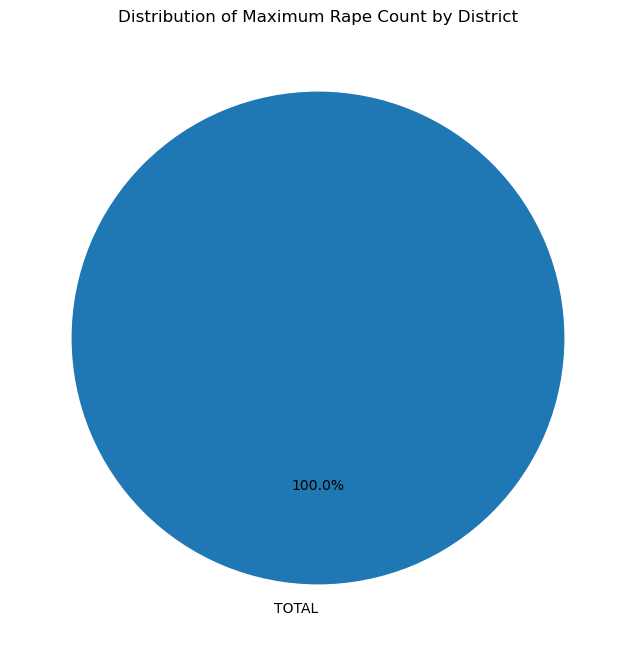

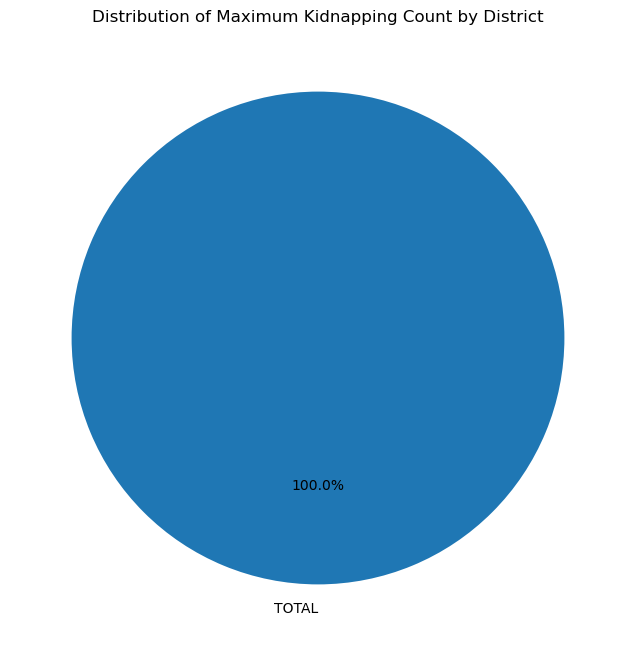

In [25]:
# Plot pie chart for maximum rape
plt.figure(figsize=(8, 8))
plt.pie(df_max_rape['rape'], labels=df_max_rape['DISTRICT'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Maximum Rape Count by District')
plt.show()

# Plot pie chart for maximum kidnapping
plt.figure(figsize=(8, 8))
plt.pie(df_max_kidnapping['kidnapping'], labels=df_max_kidnapping['DISTRICT'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Maximum Kidnapping Count by District')
plt.show()

In [26]:
# Commit the changes and close the connection
db.commit()
db.close()